In [17]:
import zipfile
zip = zipfile.ZipFile("/content/arabic characters dataset.zip")
zip.extractall("/content")
zip.close()

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 

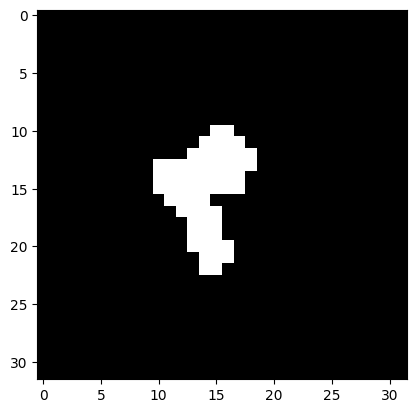

In [21]:
img = cv2.imread("/content/Test Images 3360x32x32/test/id_1000_label_24.png")
img =cv2.resize(img,(32,32))
plt.imshow(img)

# **Reading training data**

In [22]:
train_img_df = pd.read_csv("/content/csvTrainImages 13440x1024.csv")
train_label_df = pd.read_csv("/content/csvTrainLabel 13440x1.csv")

test_img_df = pd.read_csv("/content/csvTestImages 3360x1024.csv")
test_label_df = pd.read_csv("/content/csvTestLabel 3360x1.csv")

In [23]:
train_img_df.shape , train_label_df.shape ,test_img_df.shape ,test_label_df.shape

((13439, 1024), (13439, 1), (3359, 1024), (3359, 1))

Validation data

In [24]:
import random
rand = random.sample(train_img_df.index.tolist(), 500)

val_images_df = pd.DataFrame(train_img_df.iloc[rand, :].values)
val_labels_df = pd.DataFrame(train_label_df.iloc[rand, :].values)

# Convert data to a numpy array

only arrays and matrices(tensors) for a nn

In [29]:
X_train = train_img_df.to_numpy()
y_train = train_label_df.to_numpy()

X_test = test_img_df.to_numpy()
y_test= test_label_df.to_numpy()

X_val = val_images_df.to_numpy()
y_val = val_labels_df.to_numpy()

PREPROCESS

In [30]:
#number of classes
num_classes = len(np.unique(y_train)) + 1
num_classes

29

In [31]:
y_train.shape

(13439, 1)





Converts a class vector (integers) to binary class matrix.

In [32]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes)
y_valid = to_categorical(y_val,num_classes)
y_test = to_categorical(y_test,num_classes)

In [38]:
y_train.shape,y_valid.shape,y_test.shape

((13439, 29), (500, 29), (3359, 29))

In [39]:
X_train.shape,X_test.shape,X_val.shape

((13439, 32, 32, 1), (3359, 32, 32, 1), (500, 1024))

In [41]:
# -1 for compatibility it is for numpy to figure out he compatible shape(in this batch size is unknown i.e =-1)
X_train = X_train.reshape([-1, 32, 32, 1])
X_test = X_test.reshape([-1, 32, 32, 1])
X_valid = X_val.reshape([-1, 32, 32, 1])

# **Nueral NET**

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

Filters represent the number of output channels after convolution has been performed, while Kernel represents the size of a convolution filter being used to perform convolution on the image. A simpler way to understand this is by taking into account a simple convolution operation on a 3 channel RGB Image using a Convolution layer with 32 filters and kernel size of 3. Let us assume that the input image has height and width of 112 pixels, so the shape of input image becomes 112,112,3 where 112 represent the height and width, while 3 represents the channels, here RGB. Upon applying convolution on the image for single filter, we slide a 3x3 matrix (comes from kernel size) across the image that gives us a single channel output. So after a successful convolution operation, we will have an output image with 32 channels.

In [46]:
model =  Sequential()

model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(32,32,1)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(num_classes,activation="softmax"))


With "SAME" padding, if you use a stride of 1, the layer's outputs will have the same spatial dimensions as its inputs.
With "VALID" padding, there's no "made-up" padding inputs. The layer only uses valid input data.

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)       

In [48]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=5,batch_size=32)

Epoch 1/5
420/420 [==============================] - 31s 70ms/step - loss: 2.0811 - accuracy: 0.4497 - val_loss: 0.5282 - val_accuracy: 0.8280
Epoch 2/5
420/420 [==============================] - 28s 67ms/step - loss: 0.6835 - accuracy: 0.7703 - val_loss: 0.2943 - val_accuracy: 0.9080
Epoch 3/5
420/420 [==============================] - 31s 73ms/step - loss: 0.4390 - accuracy: 0.8524 - val_loss: 0.1805 - val_accuracy: 0.9560
Epoch 4/5
420/420 [==============================] - 29s 69ms/step - loss: 0.3287 - accuracy: 0.8914 - val_loss: 0.1212 - val_accuracy: 0.9580
Epoch 5/5
420/420 [==============================] - 28s 66ms/step - loss: 0.2775 - accuracy: 0.9103 - val_loss: 0.1006 - val_accuracy: 0.9720


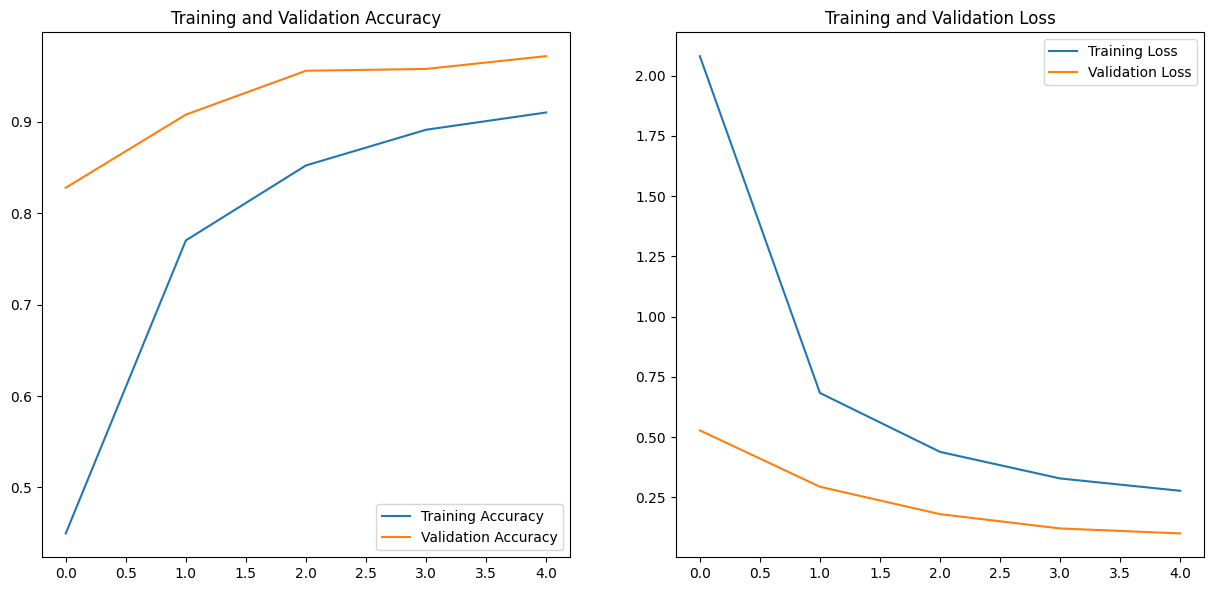

In [49]:
epochs_range = range(5)

''' training accuracy and validation accuracy graph '''
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

''' training loss and validation loss graph '''
plt.subplot(2, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
model.evaluate(X_test,y_test,batch_size=32)

105/105 [==============================] - 3s 25ms/step - loss: 0.2715 - accuracy: 0.9149


[0.27153480052948, 0.9148555994033813]

# **PLOT**

In [52]:
from sklearn.utils import shuffle

In [54]:
X_test, y_test = shuffle(X_test, y_test, random_state=30)

y_test = y_test[:10]
X_test = X_test[:10]

In [56]:
pred= model.predict(X_test)

pred_df = pd.DataFrame(pred)

1/1 [==============================] - 0s 51ms/step


In [57]:
#Get the index of the max probability from the output Data frame
pred_idx = list(pred_df.idxmax(axis=1))

In [58]:
y_test = pd.DataFrame(y_test)
actual_idx = list(y_test.idxmax(axis=1))

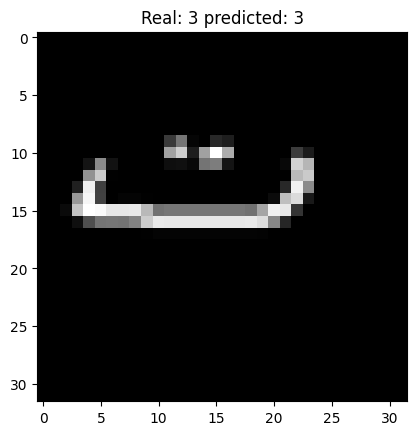

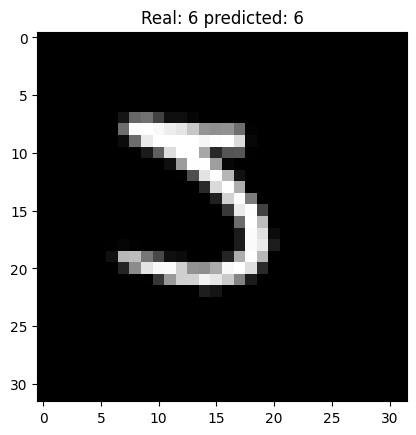

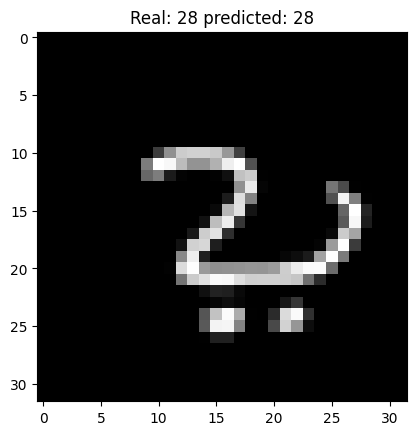

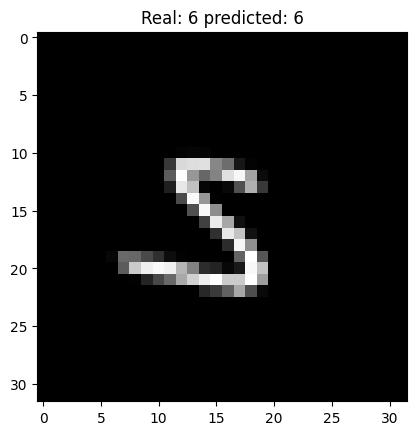

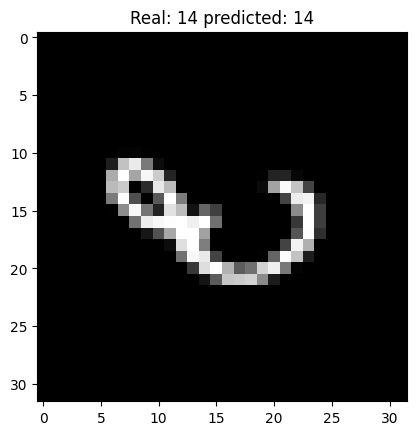

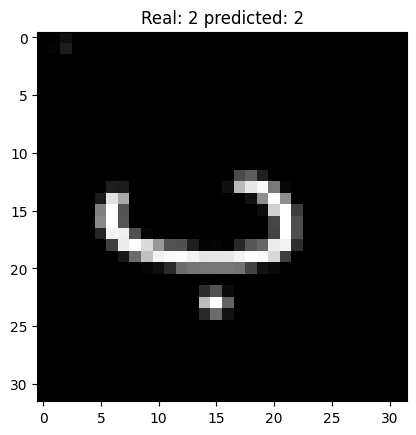

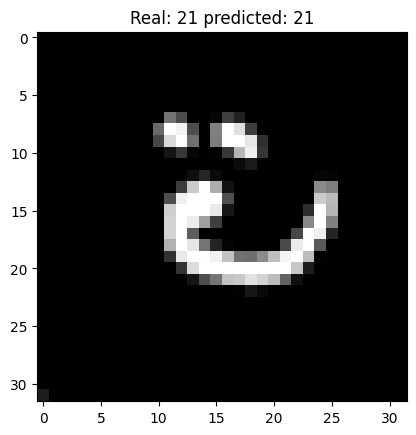

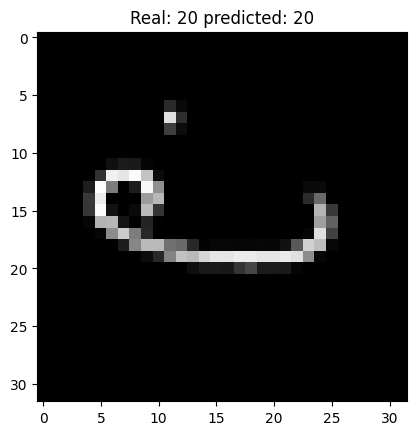

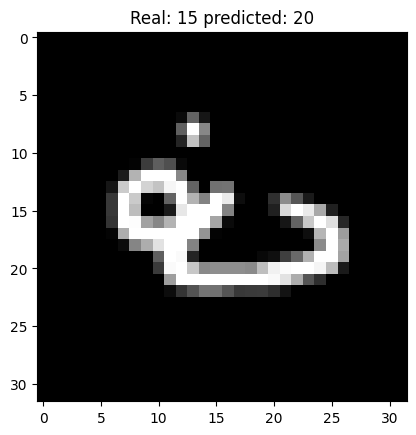

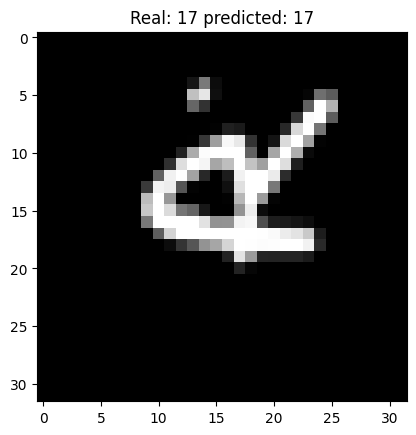

In [60]:
for i in range(len(X_test)):
    actual = actual_idx[i]
    pred = pred_idx[i]
    plt.title(f'Real: {actual} predicted: {pred}')
    img = X_test[i]
    ''' rotating images '''
    img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    plt.imshow(img,cmap='gray')
    plt.show()